## Preprocessing Stage(Step-by-step)

In [3]:
import sklearn
import numpy as np
import sklearn.tree
import sklearn.metrics
import gensim
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


### NLTK language package download
If this is your first time running this notebook you need to download nltk language package by using the following command.

In [ ]:
nltk.download()
nltk.download('punkt')

### Data cleaning and NLP stage

In [17]:
dataset = pd.read_csv('data/tweet_data.csv',encoding = "ISO-8859-1")

In [18]:
df = pd.DataFrame({'text':dataset['text'],'gender':dataset['gender']})

Inspecting null values in the dataset and dataframe.

In [19]:
def get_null_report(df):
    null_columns=df.columns[df.isnull().any()]
    print(df[null_columns].isnull().sum())
    print("---------------------------------")
    return null_columns
    
print('complete dataset')
get_null_report(dataset)
print('new dataset')
n= get_null_report(df)


complete dataset
_last_judgment_at       50
gender                  97
gender:confidence       26
description           3744
gender_gold          20000
profile_yn_gold      20000
tweet_coord          19891
tweet_location        7484
user_timezone         7798
dtype: int64
---------------------------------
new dataset
gender    97
dtype: int64
---------------------------------


Removing null values from gender and text column

In [20]:
not_null_df = df[df['gender'].notna()]
not_null_df = not_null_df[not_null_df['text'].notna()]
not_unknown_df = not_null_df[not_null_df['gender'] != 'unknown']
nf = not_unknown_df
nf

,text,gender
0,Robbie E Responds To Critics After Win Against...,male
1,ÛÏIt felt like they were my friends and I was...,male
2,i absolutely adore when louis starts the songs...,male
3,Hi @JordanSpieth - Looking at the url - do you...,male
4,Watching Neighbours on Sky+ catching up with t...,female
...,...,...
20045,"@lookupondeath ...Fine, and I'll drink tea too...",female
20046,Greg Hardy you a good player and all but don't...,male
20047,You can miss people and still never want to se...,male
20048,@bitemyapp i had noticed your tendency to pee ...,female


In [21]:
nf.to_csv('data/tweet_data_fixed_labels.csv',index=False)

Removing trivial characters and http links from tweets.

In [22]:
nltk.download('words')
words = set(nltk.corpus.words.words())
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_trivial(string):
    string = re.sub(r"http\S+", "", string)
    lst = string.split()
    n_lst = [s for s in lst if not s.startswith('@')]
    string =  " ".join(n_lst)
    string = string.lower()
    string = " ".join(w for w in nltk.wordpunct_tokenize(string) if w not in stop_words)
    string = re.sub(r"[^a-zA-Z]"," ", string)
    string = re.sub(' +', ' ', string)
    return string
    

test_str, test_label = nf['text'][3], nf['gender'][3]
print(test_str)
print(remove_trivial(test_str))

Hi @JordanSpieth - Looking at the url - do you use @IFTTT?!  Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L
hi looking url use typically see advanced user


Applying character removal to column text

In [23]:
nf['text'].apply(remove_trivial)

0        robbie e responds critics win eddie edwards wo...
1           it felt like friends living story retired ian 
2        absolutely adore louis starts songs hits hard ...
3           hi looking url use typically see advanced user
4         watching neighbours sky catching neighbs xxx xxx
                               ...                        
20045                                 fine drink tea love 
20046    greg hardy good player get face dez bryant lea...
20047                     miss people still never want see
20048      noticed tendency pee carpet want say anything p
20049    think apush creative project going bring bacon...
Name: text, Length: 18836, dtype: object

In [24]:
#copying nf dataframe to keep the original data
df_copy = nf.copy()

In [25]:
df_copy['text'] = df_copy['text'].apply(remove_trivial)

In [26]:
df_copy

,text,gender
0,robbie e responds critics win eddie edwards wo...,male
1,it felt like friends living story retired ian,male
2,absolutely adore louis starts songs hits hard ...,male
3,hi looking url use typically see advanced user,male
4,watching neighbours sky catching neighbs xxx xxx,female
...,...,...
20045,fine drink tea love,female
20046,greg hardy good player get face dez bryant lea...,male
20047,miss people still never want see,male
20048,noticed tendency pee carpet want say anything p,female


In [27]:
#checking if there is a null value in text
df_copy[df_copy['text'].isna()]

,text,gender


In [ ]:
df_copy.to_csv('data/tweet_data_fix_text_null.csv',index= False)

Stemming and Lemmatization stage

In [2]:
df = pd.read_csv("data/tweet_data_fix_text_null.csv")

In [ ]:
df = df[df['text'].notna()]
df = df[df['gender'].notna()]

In [3]:
len(df)

18831

In [3]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

Functions:
<ul>
    <li><i>single_character_remove</i>: Removing a text containing a single character</li>
    <li><i>stem</i>: Apply stemming to the text</li>
    <li><i>lemmatize</i>: Apply lemmatization to the text</li>
    <li><i>stem_lem</i>: Apply all functions together</li>
</ul>

In [4]:
def single_character_remove(text):
    return " ".join([word for word in text.split() if len(word)>1])
        
def stem(text):
    return " ".join([ps.stem(word) for word in text.split()])
def lemmatize(text):
    lst = [wn.lemmatize(word) for word in text.split()]
    return " ".join(lst)
def stem_lem(text):
    return single_character_remove(lemmatize(stem(text)))

Apply stem_lem to the text column

In [5]:
tf = df['text'].apply(lambda x: stem_lem(x))
tf

0        robbi respond critic win eddi edward worldtitl...
1                 it felt like friend live stori retir ian
2          absolut ador loui start song hit hard feel good
3                    hi look url use typic see advanc user
4                 watch neighbour sky catch neighb xxx xxx
                               ...                        
18826                                  fine drink tea love
18827    greg hardi good player get face dez bryant lea...
18828                      miss peopl still never want see
18829              notic tendenc pee carpet want say anyth
18830    think apush creativ project go bring bacon cla...
Name: text, Length: 18831, dtype: object

In [6]:
new_df = pd.DataFrame(data={'text':tf,'gender':df['gender']})

In [7]:
new_df.to_csv("data/tweet_final.csv",index=False)

### Training Doc2Vec Model

In [7]:
df = pd.read_csv('data/tweet_final.csv')

In [8]:
#some rows become null after converting the intial encoding to UTF-8
df = df[df['text'].notna()]
df.to_csv('data/tweet_final.csv',index=False)

In [9]:
sentences = df['text'].to_numpy()
tokenized = []
for s in sentences:
    tokenized.append(word_tokenize(s))


In [10]:
sent_train = tokenized[:int(0.8*len(tokenized))]
tagged_data = [TaggedDocument(d,[i]) for i,d in enumerate(sent_train)]

In [11]:
model = Doc2Vec(tagged_data,vector_size = 50, window=3, min_count=1, epochs=1500)
model.wv.vocab

{'robbi': <gensim.models.keyedvectors.Vocab at 0x1e2271229a0>,
 'respond': <gensim.models.keyedvectors.Vocab at 0x1e225df2ca0>,
 'critic': <gensim.models.keyedvectors.Vocab at 0x1e225df2e20>,
 'win': <gensim.models.keyedvectors.Vocab at 0x1e227b2c4c0>,
 'eddi': <gensim.models.keyedvectors.Vocab at 0x1e227b2c3d0>,
 'edward': <gensim.models.keyedvectors.Vocab at 0x1e227b2cfd0>,
 'worldtitleseri': <gensim.models.keyedvectors.Vocab at 0x1e227b2c340>,
 'it': <gensim.models.keyedvectors.Vocab at 0x1e227b2c5e0>,
 'felt': <gensim.models.keyedvectors.Vocab at 0x1e227b2c190>,
 'like': <gensim.models.keyedvectors.Vocab at 0x1e227b2cd30>,
 'friend': <gensim.models.keyedvectors.Vocab at 0x1e227b2c070>,
 'live': <gensim.models.keyedvectors.Vocab at 0x1e227b2cca0>,
 'stori': <gensim.models.keyedvectors.Vocab at 0x1e227b2c460>,
 'retir': <gensim.models.keyedvectors.Vocab at 0x1e227b2c1f0>,
 'ian': <gensim.models.keyedvectors.Vocab at 0x1e227b2cf10>,
 'absolut': <gensim.models.keyedvectors.Vocab at 0x1

Saving D2V model

In [6]:
with open('nlp_models/d2v.pkl','wb') as f:
    pickle.dump(model,f)

In [23]:
model.infer_vector(word_tokenize('hello how are you'))

array([ 2.0791743 , -3.1301842 ,  2.0169933 , -1.2622658 , -3.3671985 ,
       -0.1821945 , -0.958057  ,  2.3022537 ,  0.3670409 ,  7.3110957 ,
       -1.5200624 , -0.8145515 , -0.25604317, -0.16873656,  2.137538  ,
       -2.3732014 ,  0.5096463 , -0.41512665,  2.6088195 ,  0.2644506 ,
        2.2989655 , -1.3245577 , -0.3586329 ,  4.184549  , -2.3876972 ,
       -0.02125125, -1.2582213 ,  0.24326278, -0.5328809 , -2.1934736 ,
       -3.3198748 , -0.2713638 , -1.0472562 ,  1.1071064 ,  1.7526646 ,
        1.5301379 ,  0.47585416,  0.06007951,  0.08771265, -0.3691593 ,
       -0.39851567, -0.29121578,  0.5328094 , -1.2678117 ,  5.5621486 ,
        3.5775774 ,  1.0213289 , -3.663192  , -0.50614095,  1.3600783 ],
      dtype=float32)

Transforming text values into numerical vectors and store it in a csv file

In [7]:
tf = df['text'].apply(lambda x: model.infer_vector(word_tokenize(x)))
X = np.array([np.array(x) for x in tf.values])
le = LabelEncoder()
y = le.fit_transform(df['gender'].to_numpy())
with open('nlp_models/encoder.pkl','rb') as f:
    pickle.dump(le,f)
print(list(le.classes_))
matrix = np.column_stack((X,y))
pd.DataFrame(matrix).to_csv("data/transform_data.csv",index=False)

['brand', 'female', 'male']


In [23]:
model.infer_vector(word_tokenize('hello how are you'))

array([ 2.0791743 , -3.1301842 ,  2.0169933 , -1.2622658 , -3.3671985 ,
       -0.1821945 , -0.958057  ,  2.3022537 ,  0.3670409 ,  7.3110957 ,
       -1.5200624 , -0.8145515 , -0.25604317, -0.16873656,  2.137538  ,
       -2.3732014 ,  0.5096463 , -0.41512665,  2.6088195 ,  0.2644506 ,
        2.2989655 , -1.3245577 , -0.3586329 ,  4.184549  , -2.3876972 ,
       -0.02125125, -1.2582213 ,  0.24326278, -0.5328809 , -2.1934736 ,
       -3.3198748 , -0.2713638 , -1.0472562 ,  1.1071064 ,  1.7526646 ,
        1.5301379 ,  0.47585416,  0.06007951,  0.08771265, -0.3691593 ,
       -0.39851567, -0.29121578,  0.5328094 , -1.2678117 ,  5.5621486 ,
        3.5775774 ,  1.0213289 , -3.663192  , -0.50614095,  1.3600783 ],
      dtype=float32)

## Data Visualization

In [4]:
Data = np.loadtxt('data/transform_data.csv', skiprows=1, delimiter=',')
X, y = Data[:, :-1], Data[:, -1].astype('int')
X_train, X_test, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=0)

# Visualizing the dataset using tSNE

## *2D Plot*

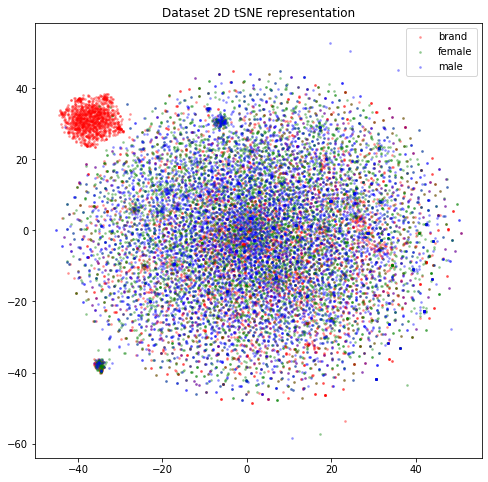

In [5]:
X_embedded = TSNE(n_components=2, random_state=0, perplexity=50, init='random').fit_transform(X)
plt.figure(figsize=(8,8))
plt.scatter(X_embedded[y==0, 0], X_embedded[y==0, 1], s=3, c='Red', label='brand', alpha=0.3)
plt.scatter(X_embedded[y==1, 0], X_embedded[y==1, 1], s=3, c='Green', label='female', alpha=0.3)
plt.scatter(X_embedded[y==2, 0], X_embedded[y==2, 1], s=3, c='Blue', label='male', alpha=0.3)
plt.title('Dataset 2D tSNE representation')
plt.legend()
plt.savefig(f'figs/tsne_random.png',facecolor='white')

## *3D Plot*

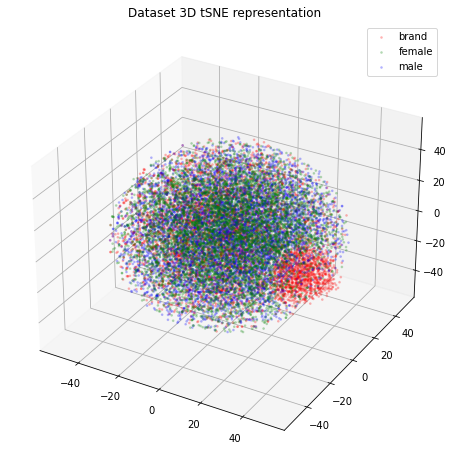

In [6]:
X_embedded = TSNE(n_components=3, random_state=0, perplexity=50, init='random').fit_transform(X)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[y==0, 0], X_embedded[y==0, 1], X_embedded[y==0, 2], s=3, c='Red', label='brand', alpha=0.2)
ax.scatter(X_embedded[y==1, 0], X_embedded[y==1, 1], X_embedded[y==1, 2], s=3, c='Green', label='female', alpha=0.2)
ax.scatter(X_embedded[y==2, 0], X_embedded[y==2, 1], X_embedded[y==2, 2], s=3, c='Blue', label='male', alpha=0.2)
plt.title('Dataset 3D tSNE representation')
plt.legend()
plt.savefig(f'figs/3dtsne_random.png',facecolor='white')